## Comparison between the EU28, Germany and Greece
Now compare all 3 education levels of the EU28 countries, Germany and Greece

In [29]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

BASE = os.path.join(os.pardir, "data", "pickles")

In [30]:
# Import EU28 data
df_eu28 = pd.read_pickle(os.path.join(BASE, 
                                      "education_employment_rate_eu28.pkl"))

In [31]:
# Import Germany data
df_germany = pd.read_pickle(os.path.join(BASE, 
                                         "education_employment_rate_germany.pkl"))

In [32]:
# Import Greece data
df_greece = pd.read_pickle(os.path.join(BASE, 
                                        "education_employment_rate_greece.pkl"))

In [33]:
dfs = [df_eu28, df_germany, df_greece]
countries = ["eu28", "germany", "greece"]

for i, df in enumerate(dfs):
    # rename columns
    df.rename(columns={'ED0-2low': f"low_{countries[i]}", 
                          'ED3_4medium': f"med_{countries[i]}", 
                          'ED5-8high': f"high_{countries[i]}"},
              inplace=True)
    
    # drop employment columns
    emp = ["ED0-2", "ED3_4", "ED5-8"]
    if countries[i] != "eu28":
        emp.append("year")
        
    df.drop(columns=emp, inplace=True)

# Merge df's
combi = pd.concat(dfs, axis=1)
combi.set_index("year", inplace=True)
combi.head()

,low_eu28,med_eu28,high_eu28,low_germany,med_germany,high_germany,low_greece,med_greece,high_greece
year,,,,,,,,,
2005,44.5,30.6,17.4,48.1,30.4,17.2,42.0,37.3,19.1
2006,43.7,29.6,16.8,45.9,28.6,15.8,40.4,37.1,17.9
2007,43.1,28.6,16.2,45.0,26.7,14.6,39.8,37.2,18.2
2008,43.6,28.3,16.2,44.1,25.8,14.3,39.6,36.7,18.0
2009,45.8,29.7,17.1,44.3,25.9,13.7,40.2,37.6,18.5


Text(0.06, 0.5, 'Note')

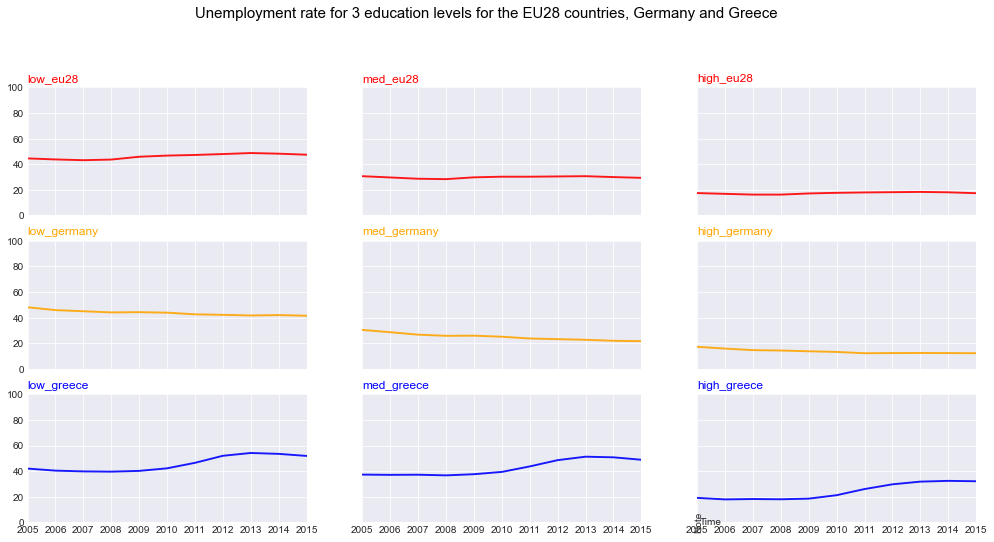

In [26]:
# Initialize the figure
plt.style.use("seaborn-darkgrid")
 
# create a color palette
palette = ["red", "orange", "blue"]

# multiple line plot
fig, axes = plt.subplots(3,3, figsize=(17,8))

for num, column in enumerate(combi):
 
    # Plot the lineplot
    axes.flatten()[num].plot(combi[column], 
                             marker='', 
                             color=palette[num // 3], 
                             linewidth=1.9, 
                             alpha=0.9, 
                             label=column)
 
    # Same limits for everybody!
    axes.flatten()[num].set_xlim(0,10)
    axes.flatten()[num].set_ylim(0,100)
 
    # Not ticks everywhere
    if num in range(6) :
        axes.flatten()[num].tick_params(labelbottom=False)
        
    if num not in [0,3,6] :
        axes.flatten()[num].tick_params(labelleft=False)
 
    # Add title
    axes.flatten()[num].set_title(column, 
                                  loc="left", 
                                  fontsize=12, 
                                  fontweight=0, 
                                  color=palette[num // 3])
 
# general title
title = "Unemployment rate for 3 education levels for the EU28 countries, Germany and Greece"
plt.suptitle(title, fontsize=15, fontweight=0, color='black', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')


### Findings
- The unemployment rate for the lower education levels is higher than the medium and higher levels of education. 
- Greece especially has an increase in unemployment after 2008, which we could assume happened after the financial crisis. 
- Germany, however, has a more stable or even decreasing unemployment rate overall. 
- Comparing Germany and the EU28 countries, it even looks like Germany has a lower unemployment rate overall, compared to all 28 EU countries combined

In [34]:
# Export
combi.to_pickle(os.path.join(BASE, 
                             "education_employment_rate_de_el_eu28.pkl"))